In [1]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit as draw
from cirq.circuits import InsertStrategy
import matplotlib.pyplot as plt
import random as rand

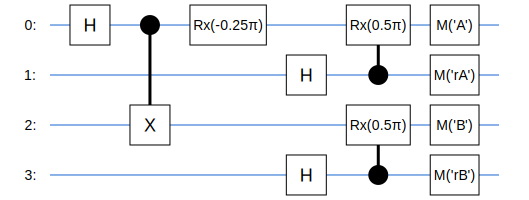

In [2]:
q=[cirq.LineQubit(i) for i in range(4)]
c=cirq.Circuit()
c.append(cirq.H(q[0]))
c.append(cirq.CNOT(q[0],q[2]))
c.append(cirq.rx(-np.pi/4).on(q[0]))
c.append(cirq.H(q[1]),strategy=InsertStrategy.NEW_THEN_INLINE)
c.append(cirq.H(q[3]),strategy=InsertStrategy.INLINE)
c.append(cirq.rx(np.pi/2).on(q[0]).controlled_by(q[1]))
c.append(cirq.rx(np.pi/2).on(q[2]).controlled_by(q[3]))
c.append(cirq.measure(q[0],key='A'))
c.append(cirq.measure(q[1],key='rA'))
c.append(cirq.measure(q[2],key='B'))
c.append(cirq.measure(q[3],key='rB'))
draw(c)

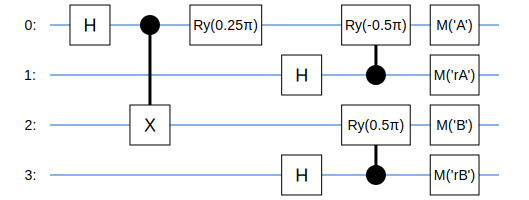

In [3]:
q=[cirq.LineQubit(i) for i in range(4)]
c=cirq.Circuit()
c.append(cirq.H(q[0]))
c.append(cirq.CNOT(q[0],q[2]))
c.append(cirq.ry(np.pi/4).on(q[0]))
c.append(cirq.H(q[1]),strategy=InsertStrategy.NEW_THEN_INLINE)
c.append(cirq.H(q[3]),strategy=InsertStrategy.INLINE)
c.append(cirq.ry(-np.pi/2).on(q[0]).controlled_by(q[1]))
c.append(cirq.ry(np.pi/2).on(q[2]).controlled_by(q[3]))
c.append(cirq.measure(q[0],key='A'))
c.append(cirq.measure(q[1],key='rA'))
c.append(cirq.measure(q[2],key='B'))
c.append(cirq.measure(q[3],key='rB'))
draw(c)

In [4]:
sim = cirq.Simulator()
result = sim.run(c, repetitions=2000)
A = result.measurements['A'][:, 0]
r_A = result.measurements['rA'][:, 0]
B = result.measurements['B'][:, 0]
r_B = result.measurements['rB'][:, 0]
(np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))
win= (np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))
np.mean(win)

0.8585

In [5]:
A[0]

0

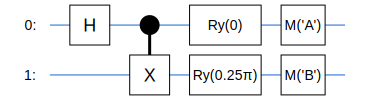

In [6]:
x=[]
y=[]
a=[]
b=[]
for i in range(900):    
    qq=[cirq.LineQubit(i) for i in range(2)]
    cc=cirq.Circuit()
    cc.append(cirq.H(q[0]))
    cc.append(cirq.CNOT(q[0],q[1]))

    random_num1 = np.random.rand() # first random number
    random_num2 = np.random.rand() # second random number

    if(random_num1>=1/2):
        x.append(1)
        cc.append(cirq.ry(np.pi/2).on(q[0]))
    else:
        x.append(0)
        cc.append(cirq.ry(0).on(q[0]))

    if(random_num2>=1/2):
        y.append(1)
        cc.append(cirq.ry(-np.pi/4).on(q[1]))
    else:
        y.append(0)
        cc.append(cirq.ry(np.pi/4).on(q[1]))

    # cc.append(cirq.rx(-np.pi/4).on(q[0]))
    # cc.append(cirq.H(q[1]),strategy=InsertStrategy.NEW_THEN_INLINE)

    # cc.append(cirq.H(q[3]),strategy=InsertStrategy.INLINE)

    # cc.append(cirq.ry(np.pi/2).on(q[0]).controlled_by(q[1]))
    # cc.append(cirq.ry(-np.pi/4).on(q[2]))
    # cc.append(cirq.ry(np.pi/2).on(q[2]).controlled_by(q[3]))
    # cc.append(cirq.rx(np.pi/2).on(q[2]).controlled_by(q[3]))
    cc.append(cirq.measure(q[0],key='A'))
    cc.append(cirq.measure(q[1],key='B'))
    # cc.append(cirq.measure(q[2],key='B'))
    # cc.append(cirq.measure(q[3],key='rB'))
    sim = cirq.Simulator()
    result = sim.run(cc, repetitions=1)
    A = result.measurements['A'][:, 0][0]
    B = result.measurements['B'][:, 0][0]
    a.append(A)
    b.append(B)
draw(cc)

In [7]:
w=np.array(x)*np.array(y)==np.array(a)^np.array(b)
np.mean(w)

0.8733333333333333

In [8]:
win= (np.array(a)+np.array(b))%2 ==(np.array(x) & np.array(y))
np.mean(win)

0.8733333333333333

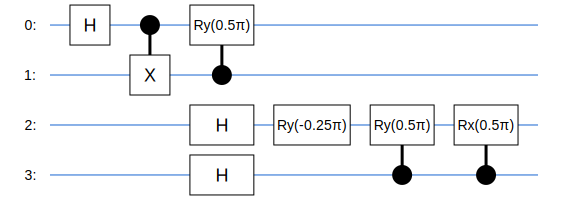

In [16]:

for i in range(900):    
    qq=[cirq.LineQubit(i) for i in range(4)]
    cc=cirq.Circuit()
    cc.append(cirq.H(q[0]))
    cc.append(cirq.CNOT(q[0],q[1]))


    # cc.append(cirq.rx(-np.pi/4).on(q[0]))
    cc.append(cirq.H(q[2]),strategy=InsertStrategy.NEW_THEN_INLINE)

    cc.append(cirq.H(q[3]),strategy=InsertStrategy.INLINE)

    cc.append(cirq.ry(np.pi/2).on(q[0]).controlled_by(q[1]))
    cc.append(cirq.ry(-np.pi/4).on(q[2]))
    cc.append(cirq.ry(np.pi/2).on(q[2]).controlled_by(q[3]))
    cc.append(cirq.rx(np.pi/2).on(q[2]).controlled_by(q[3]))
    # a.append(A)
    # b.append(B)
draw(cc)

In [17]:
sim = cirq.Simulator()
result = sim.run(cc, repetitions=500)

ValueError: Circuit has no measurements to sample.

In [11]:
A = result.measurements['A'][:, 0]
np.mean(A)

0.0

In [15]:
sim = cirq.Simulator()
result = sim.run(cc, repetitions=200)
A = result.measurements['A'][:, 0]
r_A = result.measurements['rA'][:, 0]
B = result.measurements['B'][:, 0]
r_B = result.measurements['rB'][:, 0]
(np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))
win= (np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))
np.mean(win)

ValueError: Circuit has no measurements to sample.

In [13]:
A

array([0], dtype=int8)